### Intoduction

In this dataset we will work with two objectives:

#### Objective 1: Prediction of the Electric Range based on other variables.

#### Problem:

Predict a vehicle's electric range based on available variables. For this approach we will use linear regression or random forest regression models to predict the value of the electric range variable based on the other variables.

#### Objective 2 : Classification of CAFV (Clean Alternative Fuel Vehicle) eligibility based on vehicle characteristics.

#### Problem:

Classify whether a vehicle is eligible as a CLean Alternative Fuel Vheicle (CAFV) based on the vehicle's characteristics. For this approach we will use classification models, such as decision trees or support vector machines (SVM), to predict CALF eligibility based on the available variables.

#### Importing the required libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [103]:
# Reading the csv file.
eletric= pd.read_csv("Electric_Vehicle_Population_Data.csv")

### Exploratory Data Analysis

In [104]:
eletric.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [105]:
# Type of values in each column
eletric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159467 entries, 0 to 159466
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         159467 non-null  object 
 1   County                                             159463 non-null  object 
 2   City                                               159463 non-null  object 
 3   State                                              159467 non-null  object 
 4   Postal Code                                        159463 non-null  float64
 5   Model Year                                         159467 non-null  int64  
 6   Make                                               159467 non-null  object 
 7   Model                                              159467 non-null  object 
 8   Electric Vehicle Type                              159467 non-null  object

In [106]:
eletric.shape


(159467, 17)

##### Identifying the number of missing values in each column.

In [107]:
# Identifying the number of missing values in each column.
eletric.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 361
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [108]:
eletric.duplicated().sum()

0

In [109]:
eletric.nunique().sum()

174461

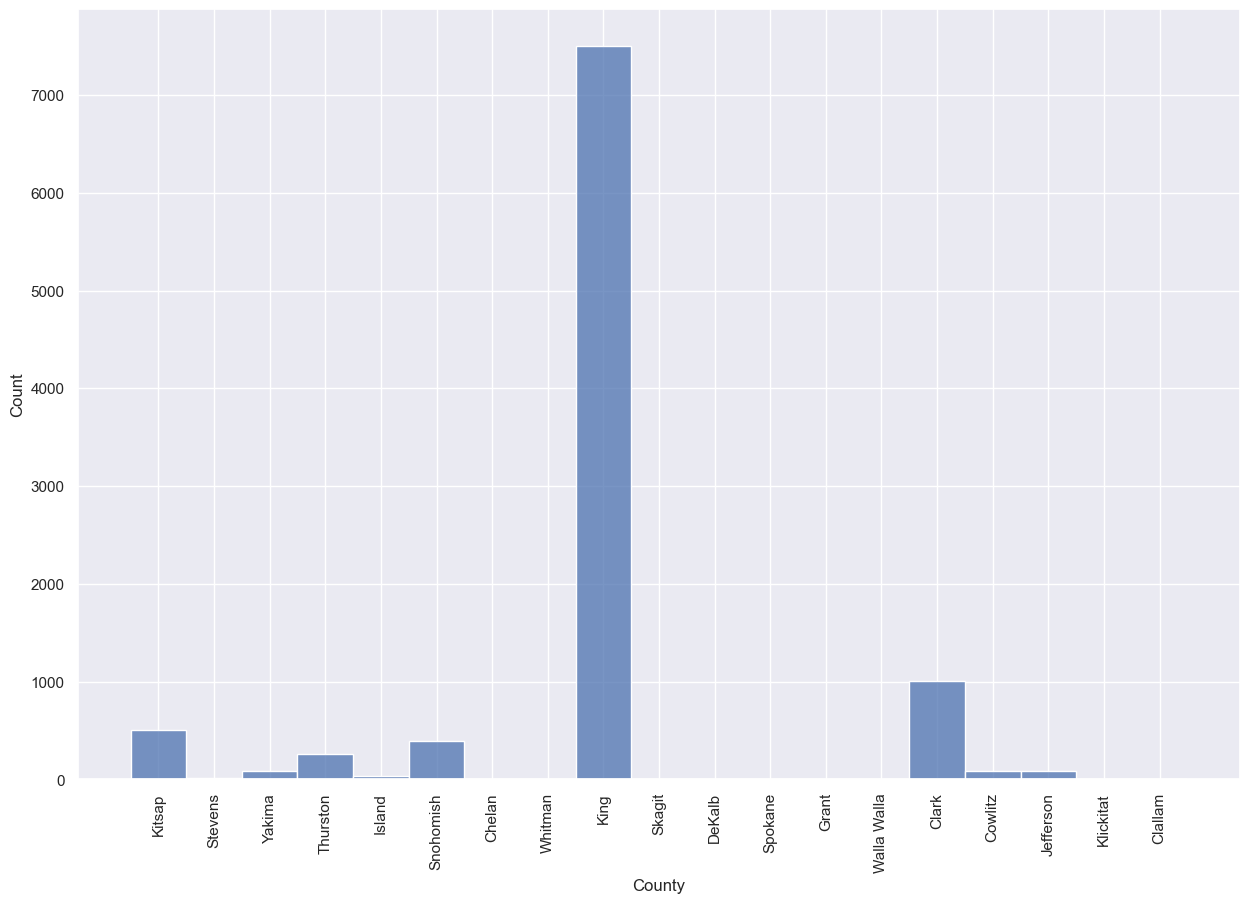

In [110]:
plt.figure(figsize=(15 , 10 ))
sns.histplot(eletric['County'][0:10000])
plt.xticks(rotation ="vertical")
plt.show()

In [111]:
eletric['Base MSRP'].value_counts()

0         156043
69900       1430
31950        392
52900        217
32250        147
54950        129
59900        129
39995        117
36900        101
44100         94
45600         85
64950         84
33950         72
52650         69
34995         65
36800         56
55700         50
53400         36
98950         21
110950        21
81100         20
90700         20
102000        16
75095         12
184400        10
43700         10
89100          6
109000         6
91250          5
32995          3
845000         1
Name: Base MSRP, dtype: int64

In [112]:
eletric.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,159463.000000,159467.000000,159467.000000,159467.00000,159106.000000,1.594670e+05,1.594630e+05
mean,98170.373635,2020.192510,64.283319,1227.63716,29.261675,2.140242e+08,5.297287e+10
std,2453.354932,3.010564,94.634277,8930.03468,14.843878,7.959275e+07,1.621526e+09
min,1730.000000,1997.000000,0.000000,0.00000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.00000,18.000000,1.731016e+08,5.303301e+10
50%,98122.000000,2021.000000,14.000000,0.00000,33.000000,2.198450e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.00000,43.000000,2.448363e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.00000,49.000000,4.792548e+08,5.603300e+10


In [113]:
media_base_msrp = eletric['Base MSRP'].mean()
print(f"Mean 'Base MSRP': {media_base_msrp}")

Mean 'Base MSRP': 1227.6371600393811


In [114]:
eletric['Electric Range'].value_counts()

0      77195
215     6359
220     4063
84      3965
25      3752
       ...  
95         3
74         3
11         2
59         1
57         1
Name: Electric Range, Length: 102, dtype: int64

##### We see here in this chart possible outiliers in 7 columns.

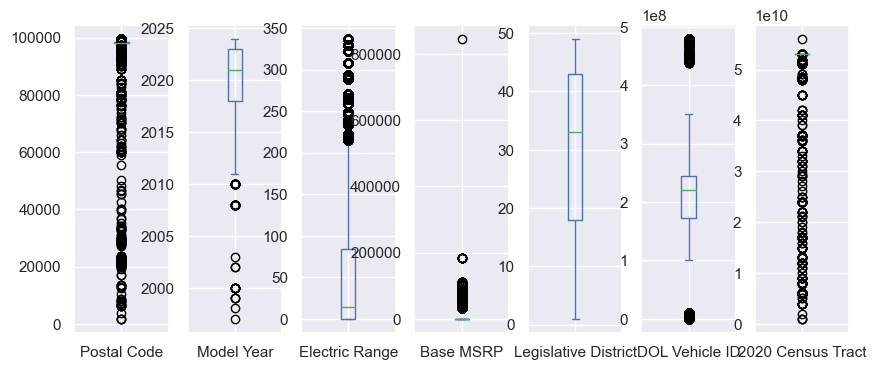

In [115]:
eletric.plot(kind='box', figsize=(10,4),subplots=True);

#### Identifying the total numbers of zero in the dataset

In [116]:
total_zeros = (eletric == 0).sum().sum()
print(f"Number of zeros: {total_zeros}")

Number of zeros: 233238


In [117]:
zeros_por_coluna = eletric.eq(0).sum()


print("Númber of zeros per column:")
print(zeros_por_coluna)

Númber of zeros per column:
VIN (1-10)                                                0
County                                                    0
City                                                      0
State                                                     0
Postal Code                                               0
Model Year                                                0
Make                                                      0
Model                                                     0
Electric Vehicle Type                                     0
Clean Alternative Fuel Vehicle (CAFV) Eligibility         0
Electric Range                                        77195
Base MSRP                                            156043
Legislative District                                      0
DOL Vehicle ID                                            0
Vehicle Location                                          0
Electric Utility                                          0
2020 Census 

##### These counts provide insights, into the distribuition of vehicle elegibility based on battery range in a given dataset, this information can be used to understand the proportion of different categories in the sample.



In [118]:
eletric['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Eligibility unknown as battery range has not been researched    77195
Clean Alternative Fuel Vehicle Eligible                         63824
Not eligible due to low battery range                           18448
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64




#### This code creates a bar plot using seaborn, to visualize the count of cars for each manufacturer in the dataset.
#### It labels each bar, with the corresponding count and provides an interpretion, indicating that Tesla is the top manufacturer among the total 38 companies based on the number of cars in the dataset.









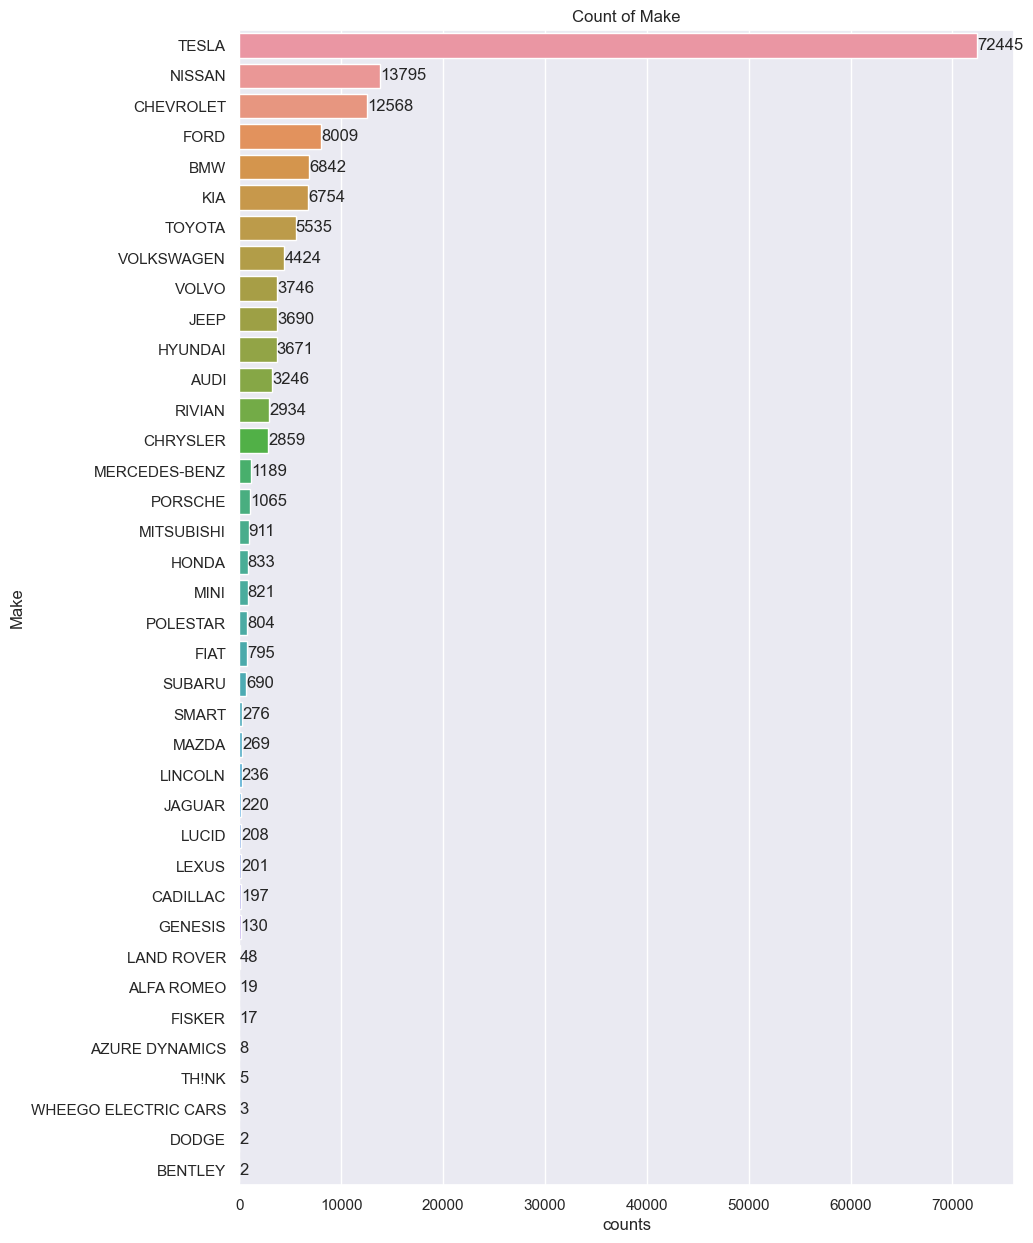

In [119]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='Make').size().reset_index(name="counts").sort_values('counts', ascending=False), 
              y='Make', x='counts')
ax.set(title="Count of Make") 

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    
    ax.text(x = width+5, 
    y = p.get_y()+(height/2), 
    s = "{:.0f}".format(width), 
    va = "center") 
    





#### This code creates a bar plot using seaborn, to visualize the count of cars for each manufacturer in the dataset.
#### It labels each bar, with the corresponding count and provides an interpretion, indicating that TEsla is Mainly represented by Model Y and Model 3, whereas Nissan is represented by Leaf. 




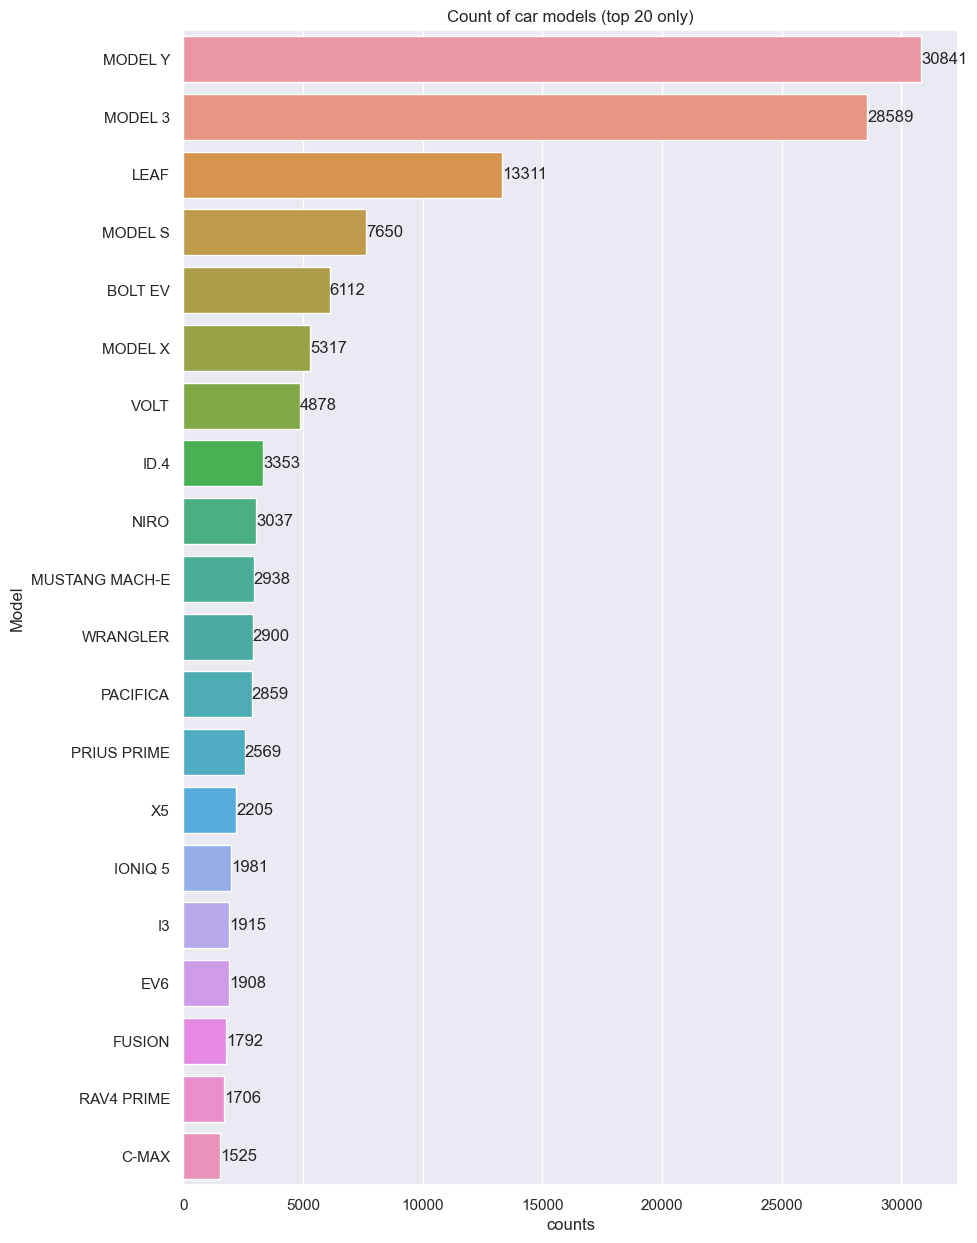

In [120]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='Model').size().reset_index(name="counts").sort_values('counts', ascending=False).head(20), 
              y='Model', x='counts')
ax.set(title="Count of car models (top 20 only)") 


for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    
    ax.text(x = width+5, 
    y = p.get_y()+(height/2), 
    s = "{:.0f}".format(width), 
    va = "center") 
    






#### These counts provide insights into the distribution of eletric vehicles based on their types in the dataset.





In [121]:
eletric['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            124153
Plug-in Hybrid Electric Vehicle (PHEV)     35314
Name: Electric Vehicle Type, dtype: int64

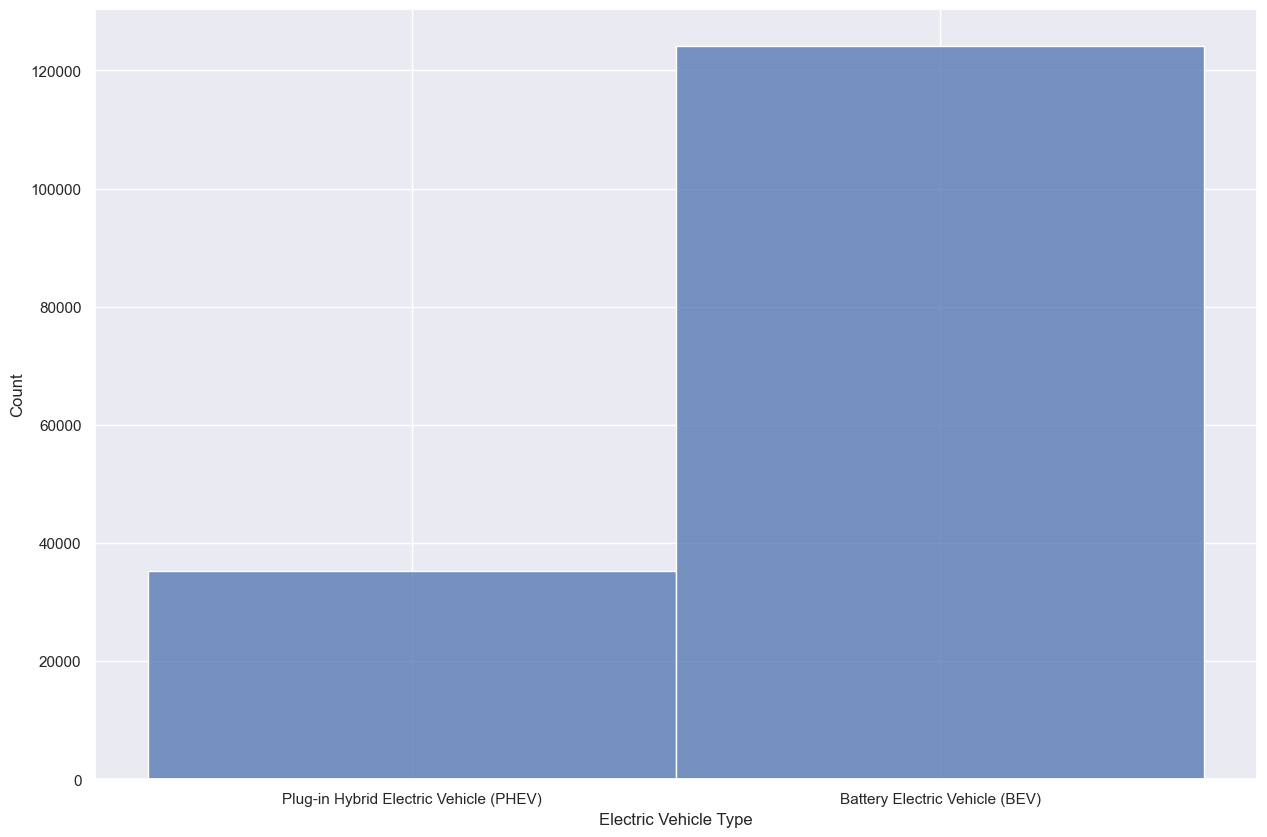

In [122]:
plt.figure(figsize=(15,10))
sns.histplot(eletric['Electric Vehicle Type'])
plt.show()

##### These counts provide insights into the distribution of eletric vehicles based on their Model Year in the dataset.

In [123]:
eletric['Model Year'].value_counts()

2023    45244
2022    27680
2021    18737
2018    14328
2020    11394
2019    10730
2017     8576
2016     5604
2015     4897
2013     4516
2014     3561
2024     1714
2012     1645
2011      780
2010       24
2008       21
2000        8
1999        3
2002        2
1998        1
1997        1
2003        1
Name: Model Year, dtype: int64

### # This plot provide the information about the evolution of electric cars per Year in Washington (1997-2023).

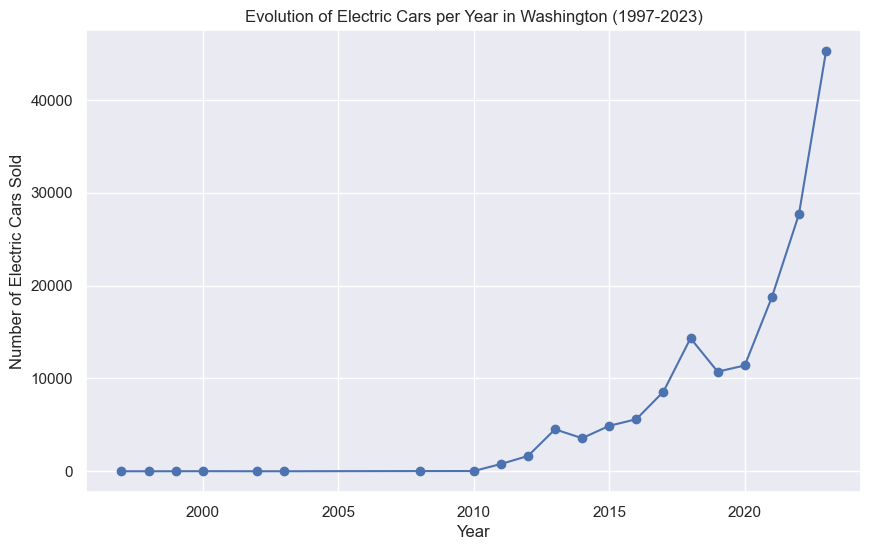

In [124]:
import matplotlib.pyplot as plt

eletric_until_2023 = eletric[eletric['Model Year'] <= 2023]


count_per_year = eletric_until_2023['Model Year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.plot(count_per_year.index, count_per_year.values, marker='o', linestyle='-')


plt.title('Evolution of Electric Cars per Year in Washington (1997-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Electric Cars Sold')


plt.grid(True)
plt.show()

##### This code is creating a bar plot using Seaborn to visualize the count of electric cars in the top 50 counties. It labels each bar with the corresponding count and provides an interpretation related to the main representations in County King.

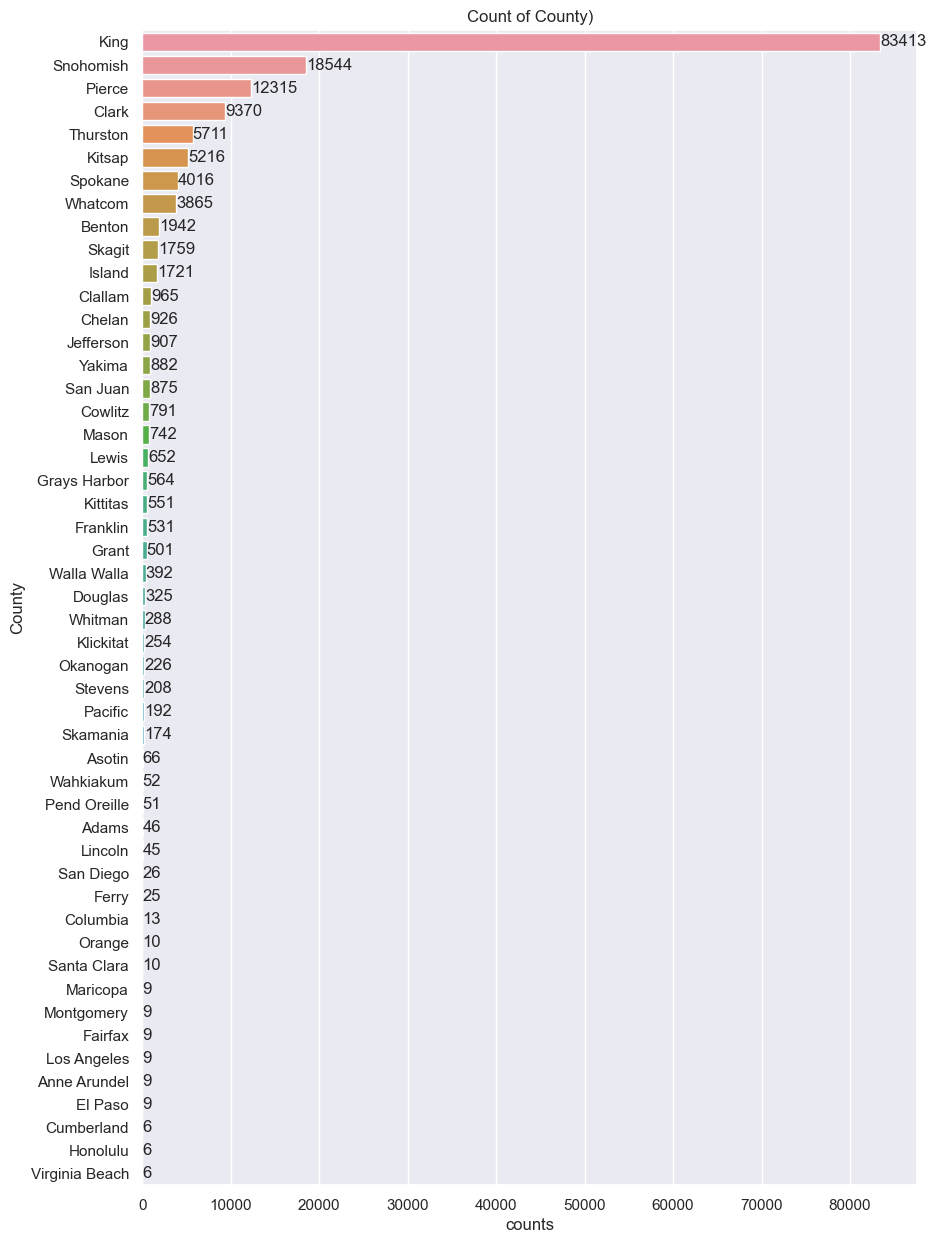

In [125]:
sns.set(rc={"figure.figsize":(10,15)})
ax = sns.barplot(data=eletric.groupby(by='County').size().reset_index(name="counts").sort_values('counts', ascending=False).head(50), 
              y='County', x='counts')
ax.set(title="Count of County)") 

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    
    ax.text(x = width+5, 
    y = p.get_y()+(height/2), 
    s = "{:.0f}".format(width), 
    va = "center") 
    



In [126]:
eletric.shape

(159467, 17)

### Aplying the PCA

Now we are going to execute PCA Model in order to reduce the curse of dimensionality to avoid in this case, specially two things: Computational Complexity -As algorithms need to work exponentially harder as the number of dimensions increases. Increased Sparsity: As dimensions increase, data points become more distant from each other, reducing data density and creating more space between them within the dimensions.
and
Overfitting: The risk of a model capturing random noise as meaningful patterns, particularly when the number of features approaches or exceeds the number of observations.

But there is a challenge, our dataset is based on string (text), in order to run PCA we need to drop these columns or which is more appropriate in this case, handle all categorial values to numeric representation. We learned two different approach to do it on class, one-hot-encoder and label enconder, we are going to use both, depending on the column details, binario or categorical.

In [127]:
columns = eletric.columns
print(columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [128]:
column_types = eletric.dtypes
print(column_types)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

### Based on columns type above, we can use label enconding approach to all columns type float64 and int64 and one-hot enconding to columns type object.

In [129]:
# Seleção das colunas numéricas para label encoding
numeric_columns = ['Model Year', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                   'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Postal Code',
                   '2020 Census Tract']

# Label encoding numeric columns
label_encoder = LabelEncoder()
for col in numeric_columns:
    eletric[col] = label_encoder.fit_transform(eletric[col])


categorical_columns = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Vehicle Location', 'Electric Utility']


eletric_encoded = pd.get_dummies(eletric[categorical_columns])


eletric_final = pd.concat([eletric[numeric_columns], eletric_encoded], axis=1)


eletric_final_sampled = eletric_final.sample(frac=0.2, random_state=42)

scaler = StandardScaler()
eletric_final_scaled = scaler.fit_transform(eletric_final_sampled)

In [130]:
# Apply PCA with a smaller number of components
pca = PCA(n_components=10)  
eletric_pca = pca.fit_transform(eletric_final_scaled)

# Visualizing the Cumulative Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.00082953 0.00162756 0.0023115  0.00290724 0.00349154 0.00406731
 0.0046407  0.00520598 0.0057699  0.00632807]


In this case, the first principal component explains approximately 0.085% of the total variance of the data, the second principal component explains about 0.171%, and so on. The tenth major component explains about 0.63%.

To assess whether this is "good" or "bad" is a matter of context and specific requirements of the problem. In general, the higher the percentage of variance explained by the first principal components, the better, as it means that these components capture a significant amount of information from the original data.

In this case, the first principal components explain a relatively small amount of the total variance. This tells us that the patterns in our data are complex and cannot be fully captured by a small number of core components. That is, the data may have a more complicated structure that cannot be well represented by a PCA with a small number of components.

The percentage of variance explained by the first principal components does not meet our needs, we could consider increasing the number of principal components, but we ran into excessive memory usage that made it impossible to use 100% of the dataset after trying to run PCA + One-hot-encoding for binary columns and label_enconding for categorical columns in order to convert string to number.

We will continue with the analysis of the work by running 2 machine learning techniques, but given the previous problem in PCA, we are not sure about the accuracy of the results. Let's find out next.

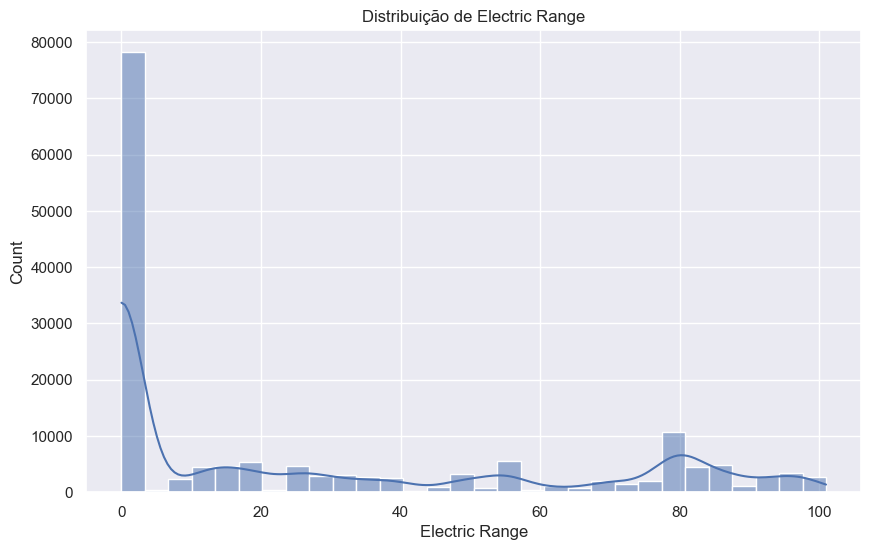

In [131]:
# Histogram: showing the variable Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(eletric['Electric Range'], bins=30, kde=True)
plt.title('Distribuição de Electric Range')
plt.show()

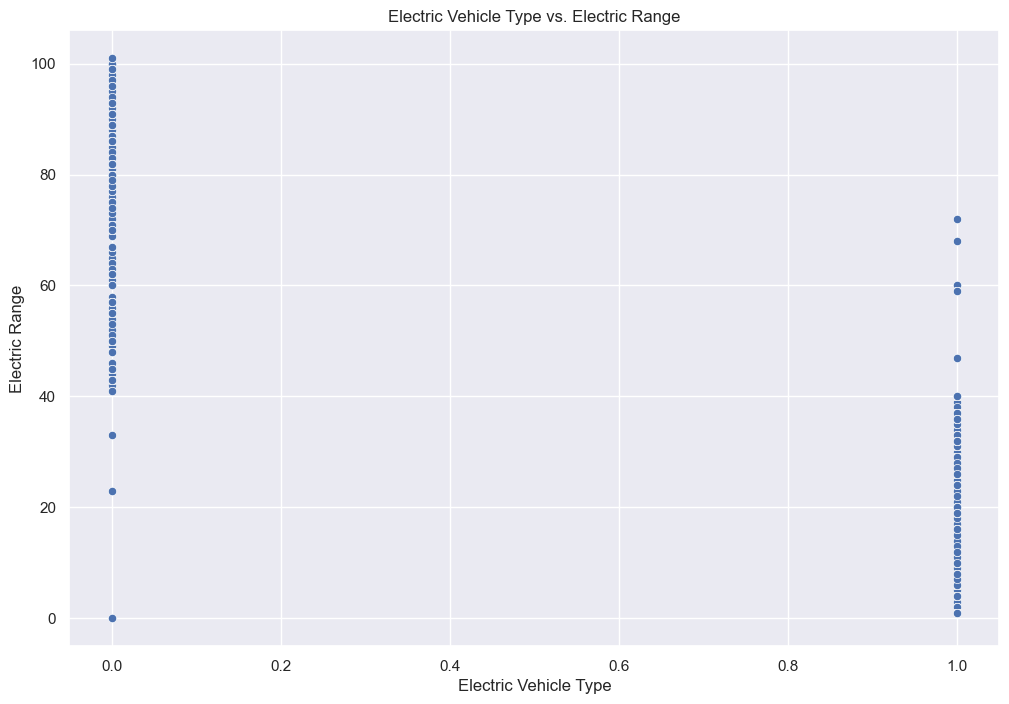

In [132]:
# Scatter plot para Base MSRP vs. Electric Range
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Electric Vehicle Type', y='Electric Range', data=eletric)
plt.title('Electric Vehicle Type vs. Electric Range')
plt.show()

In [133]:
# Verifying the null values
print(eletric.isnull().sum())


VIN (1-10)                                           0
County                                               4
City                                                 4
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     9
Electric Utility                                     4
2020 Census Tract                                    0
dtype: int64


In [134]:
# Data Preprocessing 
# We will treat the 5 null variables in the "Vehicle Location" column and apply one-hot-encoding to categorical variables.
# Threating the null values

eletric = eletric.dropna(subset=['Electric Range', 'Base MSRP'])
eletric = eletric.fillna(0) 

In [135]:
# Verifying the null values.
print(eletric.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


#### After got a lot of errors, instead of use selec_dttypes to indetify numeric and categorical values we choose to use the command "Columntransformer" to apply the correct transformation based on the type of the columns.

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector

# Selecting the columns
eletric = eletric[['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
                   'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                   'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
                   'Vehicle Location', 'Electric Utility', '2020 Census Tract']]

# Converter todas as colunas para string
eletric = eletric.astype(str)

# Criar pipeline para pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), selector(dtype_exclude="object")),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), selector(dtype_include="object"))
    ])

# Applying the preprocessor
eletric_processed = preprocessor.fit_transform(eletric)

#### Modeling Objectives :
Regression Model to predict Eletric Range: lets create a regression model to predict the Eletric Range Variable

In [69]:
# Dividing the dataset in x and y
X = eletric_processed
y = eletric['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Training the the Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [71]:
# making predictions
y_pred = regression_model.predict(X_test)

In [72]:
# Avaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.36741690346328465


In [73]:
# Dividing the dataset in x and y
X = eletric_processed
y = eletric['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# We choose 20% of the dataset to test, 80% will be to train

In [74]:
# Training the the Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
# making predictions
y_pred = regression_model.predict(X_test)

In [76]:
# Avaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.5226081330676545


In [77]:
# Dividing the dataset in x and y
X = eletric_processed
y = eletric['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We choose 20% of the dataset to test, 80% will be to train

In [78]:
# Training the the Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [79]:
# making predictions
y_pred = regression_model.predict(X_test)

In [80]:
# Avaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.49796712903588386


In [97]:
# Dividing the dataset in x and y
X = eletric_processed
y = eletric['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We choose 20% of the dataset to test, 80% will be to train

In [98]:
# making predictions
y_pred = regression_model.predict(X_test)

## Conclusion: ##

O Mean Squared Error (MSE) é uma métrica comum usada para avaliar o desempenho de modelos de regressão. Em termos simples, o MSE mede a média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais.
No nosso caso, o MSE é aproximadamente 0.0644. Em geral, valores de MSE mais baixos indicam um melhor ajuste do modelo aos dados. Portanto, um MSE de 0.0644 pode ser considerado bom.
Para interpretar o MSE de uma forma mais intuitiva, podemos considerar que o MSE é uma medida quadrática média dos erros. Quanto mais próximo de zero, melhor. 
Em resumo, um MSE de 0.0644 sugere que o seu modelo de regressão está fazendo previsões razoavelmente boas com base nos dados fornecidos. No entanto, para uma avaliação mais completa, também é útil considerar outras métricas de desempenho, dependendo do contexto do problema.

### Model 2 - Random Forest
Modelo de Classificação para CAFV Eligibility:
Agora, criaremos um modelo de classificação para prever a elegibilidade CAFV. Classificar se um veículo é elegível como Clean Alternative Fuel Vehicle (CAFV) com base nas características do veículo. Abordagem:

UVanos usar Árvores de Decisão, para prever a elegibilidade CAFV com base nas variáveis disponíveis. Vamos Converter a variável alvo "Clean Alternative Fuel Vehicle (CAFV) Eligibility" em uma variável binária (1 para elegível, 0 para não elegível). Vamos avaliar o desempenho do modelo usando métricas de classificação, como precisão, recall e F1-Score.

In [81]:
# Convert the target variable in binary (0 or 1)
eletric['CAFV Eligibility'] = eletric['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].apply(lambda x: 1 if x == 'Clean Alternative Fuel Vehicle (CAFV) Eligible' else 0)

In [82]:
# Spliting the dataset in x and y
X_classification = eletric_processed
y_classification = eletric['CAFV Eligibility']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

In [83]:
# Training the the Linear Regression Model
classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [84]:
# making predictions
y_pred_clf = classification_model.predict(X_test_clf)

In [85]:
# Avaluating the model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [86]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test_clf, y_pred_clf)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31894

    accuracy                           1.00     31894
   macro avg       1.00      1.00      1.00     31894
weighted avg       1.00      1.00      1.00     31894



In [88]:
# Dividing the dataset in x and y
X_classification = eletric_processed
y_classification = eletric['CAFV Eligibility']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.1, random_state=42)

In [89]:
# Training the the Linear Regression Model
classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [90]:
# making predictions
y_pred_clf = classification_model.predict(X_test_clf)

In [91]:
# Avaluating the model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [92]:
# Dividing the dataset in x and y
X_classification = eletric_processed
y_classification = eletric['CAFV Eligibility']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [93]:
# Training the the Linear Regression Model
classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [94]:
# making predictions
y_pred_clf = classification_model.predict(X_test_clf)

In [95]:
# Avaluating the model
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


### Conclusion:
The result "Accuracy: 1.0" shows that our model of classification Random Forest got an accuracy of 100%, it means that all forecast made by this model matched with the real label on the dataset. In other words, this model for this dataset and this goal, witch is classify if the vehicle is eligeble as an Clean Alternative Fuel Vehicle is 100% of accuracy.